# Introduction

We're trying to understand how the spikes (and genes) behave on our single cell datasets

# Index

* Spike Scatter plots
* <a href="#Hs_purkinje-spike-scatter">Hs_purkinje spike scatter</a>
* <a href="#Hs_asp_purkinje_UMB5294-spike-scatter">Hs_asp_purkinje_UMB5294 spike scatter</a>
* <a href="#Mm_purkinje-spike-scatter">Mm_purkinje spike scatter</a>
* <a href="#Mm_pyramidal-spike-scatter">Mm_pyramidal spike scatter</a>

* <a href="#Spike-Correlation-Histograms">Spike Correlation Histograms</a>
  * <a href="#Rafa-Spearman-ERCC-Spike-Correlation-Histograms">Rafa Spearman Spike Correlation Histograms</a>
    * <a href="#Hs_purkinje-ERCC-spike-Rafa-Spearman-histogram">Hs_purkinje ERCC spike Rafa Spearman histogram</a>
    * <a href="#Mm_purkinje-ERCC-spike-Rafa-Spearman-histogram">Mm_purkinje ERCC spike Rafa Spearman histogram</a>
    * <a href="#Mm_layer_V_pyramidal-ERCC-spike-Rafa-Spearman-histogram">Mm_layer_V_pyramidal ERCC spike Rafa Spearman histogram</a>
  * <a href="#Naive-Spearman-ERCC-Spike-Correlation-Histograms">Naive Spearman ERCC Spike Correlation Histograms</a>
    * <a href="#Hs_purkinje-ERCC-spike-Rafa-Spearman-histogram">Hs_purkinje ERCC spike Rafa Spearman histogram</a>
    * <a href="#Mm_purkinje-ERCC-spike-Rafa-Spearman-histogram">Mm_purkinje ERCC spike Rafa Spearman histogram</a>
    * <a href="#Mm_layer_V_pyramidal-ERCC-spike-Rafa-Spearman-histogram">Mm_layer_V_pyramidal ERCC spike Rafa Spearman * <a href="#All-genes-correlation-histograms">All genes correlation histograms</a>
  * <a href="#Rafa-Speraman-Correlation-Histograms">Rafa Speraman Correlation Histograms</a>
  * <a href="#Naive-Spearman-Correlation-Histograms">Naive Spearman Correlation Histograms</a>
* <a href="#Genes-Detected">Genes Detected</a>
* <a href="#Hs_purkinje_poolsplit-Covariance">Hs_purkine_poolsplit Covariance</a>
* <a href="#Hs_purkinje_poolsplit-shuffled-Covariance">Hs_purkine_poolsplit Shuffled Covariance</a>
* <a href="#Hs_purkinje_poolsplit-shuffled-Genes-Detected">Hs_purkine_poolsplit Shuffled Genes Detected</a>

In [1]:
import pandas
import numpy
import os
import sys
import collections

import bokeh
from bokeh import mpl
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.io import output_notebook
import bokeh.io
import bokeh.resources
import bokeh.charts
from bokeh.models import HoverTool
from bokeh.palettes import *


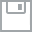
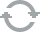
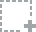
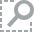
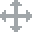
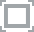
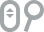
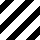
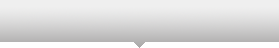
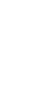
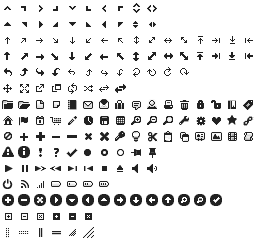
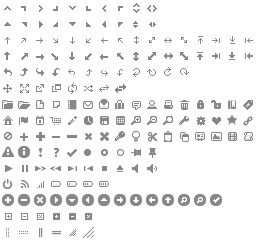
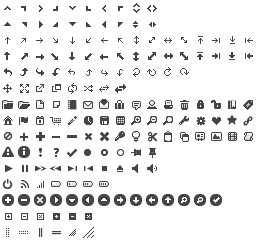
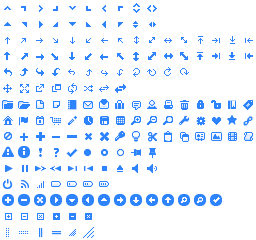
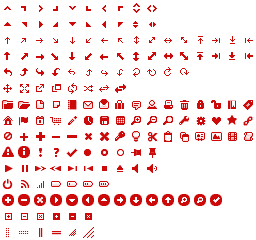
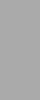
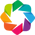
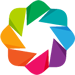

In [2]:
output_notebook()

In [3]:
LONG_RNA_SEQ = os.path.expanduser('~diane/proj/long-rna-seq-condor')
if LONG_RNA_SEQ not in sys.path:
    sys.path.append(LONG_RNA_SEQ)
from models import get_single_spike_cpc
from madqc import compute_all_vs_all_scores

In [4]:
def create_figure(xname, yname, extra_title='', **kwargs):
    hover = HoverTool(
        tooltips = [
            (xname, '@'+xname),
            (yname, '@'+yname),
            ('gene_id', '@gene_id'),
            ('library_id', '@library_id'),
            ('name', '@experiment_name'),
            # description is too long for my tooltip box
            #('description', '@description'),
            #('organism', '@organism'),
            #('biosample', '@biosample'),
            #('source', '@biosample_lab'),
            #('starting', '@starting'),
            #('age', '@age'),
            #('lab', '@lab'),
            #('rfa', '@rfa'),
        ]
    )    

    p = figure(
        title = "{} vs {} {}".format(xname, yname, extra_title),
        tools=['box_zoom', 'wheel_zoom', 'pan', hover, 'save', 'reset'],
        **kwargs
    )
    p.xaxis.axis_label = xname
    p.yaxis.axis_label = yname
    
    return p

def setdefault_style(**kwargs):
    extra = kwargs.copy()
    extra.setdefault('fill_alpha', 0.4)
    extra.setdefault('size', 7)
    extra.setdefault('line_color', 'black')
    extra.setdefault('line_alpha', 0.4)
    return extra



In [5]:
rsems = pandas.HDFStore('rsem-genes.h5', 'r')

In [6]:
library_to_name = {}
experiment_names = {}
for i, row in rsems['metadata'].iterrows():
    library_to_name[str(row.library_id)] = row.experiment_name
    experiment_names.setdefault(row.experiment_name, []).append(row.library_id)

In [7]:
for k in sorted(experiment_names.keys()):
    print(k, ','.join(experiment_names[k]))

Hs_asp_purkinje_UMB5294_poolsplit 13843,13844,13845,13846,13847,13848,13849,13850,13851,13852,13853,13854,13855,13856,13857,13858,13859,13860
Hs_asp_purkinje_UMB5294_single 13824,13825,13826,13827,13828,13829,13830,13831,13832,13833,13834,13835,13836,13837,13838,13839,13840,13841,13842
Hs_purkinje_poolsplit 13645,13646,13647,13648,13649,13650,13651,13652,13653,13654,13655,13656,13657,13658,13659,13660,13661,13662,13663,13664
Hs_purkinje_single 13625,13626,13627,13628,13629,13630,13631,13632,13633,13634,13635,13636,13637,13638,13639,13640,13641,13642,13643,13644
Mm_layer_V_pyramidal_poolsplit 15304,15305,15306,15307,15308,15309,15310,15311,15356,15357,15358,15359,15360,15361,15362
Mm_layer_V_pyramidal_single 15272,15273,15275,15276,15277,15278,15279,15280,15281,15282,15283,15284,15285,15286,15287,15352,15353,15354
Mm_purkinje_poolsplit 15288,15289,15290,15291,15292,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302,15303
Mm_purkinje_single 15256,15257,15258,15259,15260,15261,15

In [8]:
name_to_color = {
    'Hs_asp_purkinje_UMB5294_poolsplit': Purples3[0],
    'Hs_asp_purkinje_UMB5294_single': Purples3[1],
    
    'Hs_purkinje_single': Oranges3[0],
    'Hs_purkinje_poolsplit': Oranges3[1],
    
    'Mm_purkinje_single': Blues3[0],
    'Mm_purkinje_poolsplit': Blues3[1],
    
    'Mm_layer_V_pyramidal_single': Greens3[0],
    'Mm_layer_V_pyramidal_poolsplit': Greens3[1],
}

def make_linked_axes():
    hs_purkinje_x = bokeh.models.DataRange1d()
    hs_asp_purkinje_x = bokeh.models.DataRange1d()
    mm_purkinje_x = bokeh.models.DataRange1d()
    mm_pyramidal_x = bokeh.models.DataRange1d()

    hs_purkinje_y = bokeh.models.DataRange1d()
    hs_asp_purkinje_y = bokeh.models.DataRange1d()
    mm_purkinje_y = bokeh.models.DataRange1d()
    mm_pyramidal_y = bokeh.models.DataRange1d()

    name = {}
    name['y'] = {
        'Hs_asp_purkinje_UMB5294_poolsplit': hs_asp_purkinje_y,
        'Hs_asp_purkinje_UMB5294_single': hs_asp_purkinje_y,
    
        'Hs_purkinje_single': hs_purkinje_y,
        'Hs_purkinje_poolsplit': hs_purkinje_y,
    
        'Mm_purkinje_single': mm_purkinje_y,
        'Mm_purkinje_poolsplit': mm_purkinje_y,
    
        'Mm_layer_V_pyramidal_single': mm_pyramidal_y,
        'Mm_layer_V_pyramidal_poolsplit': mm_pyramidal_y,
    }

    name['x'] = {
        'Hs_asp_purkinje_UMB5294_poolsplit': hs_asp_purkinje_x,
        'Hs_asp_purkinje_UMB5294_single': hs_asp_purkinje_x,
    
        'Hs_purkinje_single': hs_purkinje_x,
        'Hs_purkinje_poolsplit': hs_purkinje_x,
    
        'Mm_purkinje_single': mm_purkinje_x,
        'Mm_purkinje_poolsplit': mm_purkinje_x,
    
        'Mm_layer_V_pyramidal_single': mm_pyramidal_x,
        'Mm_layer_V_pyramidal_poolsplit': mm_pyramidal_x,
    }
    return name

In [9]:
spike_cpcs = dict(get_single_spike_cpc())

def make_spike_colors(cpcs):
    colors = [
        Blues3[0],
        Greens3[0],
        Reds3[0],
        Purples3[0],
        Greys3[0],
        BrBG3[2],
        Greys4[3],
    ]
    spike_color_map = {}
    cpc_counter = collections.Counter()
    
    for name, cpc in cpcs.items():
        spike_color_map[name] = colors[cpc_counter[cpc]]
        cpc_counter[cpc] += 1
    
    return spike_color_map

spike_color_map = make_spike_colors(spike_cpcs)

In [10]:
def jitter_spike(name):
    cpc = spike_cpcs.get(name, None)
    if cpc:
        spread = min((0.1 * cpc), 100)
        cpc = cpc + (spread * (numpy.random.random() - 0.5))
        return cpc
    return numpy.nan

In [11]:
#pool_fpkm = create_figure('spike_cpc', 'FPKM', 'Pool Split')
#single_fpkm = create_figure('spike_cpc', 'FPKM', 'Single')

name_axes = make_linked_axes()
plots  = {name: create_figure('spike_cpc', 'FPKM', name, 
                              y_range=name_axes['y'][name],
                              x_range=name_axes['x'][name],
                             ) for name in name_to_color }
extra = setdefault_style(fill_alpha=0.6)
missing_spike_data = collections.Counter()

for key in [ x for x in rsems.keys() if x.startswith('/genes/')]:
    library_id = key[-5:]
    experiment_name = library_to_name[library_id]
    rsem = rsems[key]
    spike_filter = rsem['gene_id'].map(lambda x: x.startswith('gSpikein'))

    rsem['library_id'] = library_id
    rsem['experiment_name'] = experiment_name
    rsem['spike_cpc'] = rsem[spike_filter]['gene_id'].map(jitter_spike)
    rsem['spike_color'] = rsem[spike_filter]['gene_id'].map(lambda x: spike_color_map.get(x))
    
    for spike_name in rsem[spike_filter]['gene_id']:
        if spike_name not in spike_color_map:
            missing_spike_data[spike_name] += 1
        
    plots[experiment_name].circle(
        'spike_cpc', 'FPKM', 
        source=ColumnDataSource(rsem[spike_filter]),
        color=rsem[spike_filter]['spike_color'],            
        #legend=name,
        **extra)

missing_spike_data

Counter({'gSpikein_ERCC-00018': 142, 'gSpikein_ERCC-00128': 142, 'gSpikein_ERCC-00007': 142, 'gSpikein_ERCC-00023': 142})

In [12]:
def show_and_save_pairs(plots, left, right, title):
    p = bokeh.io.hplot(plots[left], plots[right])
    filename = os.path.join('/dev/shm/{}.html'.format(title.lower().replace(' ', '_')))
    resources = bokeh.resources.Resources(
        mode='server',
        root_url='/~diane/bokeh/0.10.0/'
    )
    bokeh.io.save(obj=p, filename=filename, resources=resources, title=title)
    show(p)

# Hs_purkinje spike scatter

<a href="#Index">Back to index</a>

In [13]:
show_and_save_pairs(plots, 'Hs_purkinje_poolsplit', 'Hs_purkinje_single', 'HS_purkinje cpt vs FPKM')

# Hs_asp_purkinje_UMB5294 spike scatter

<a href="#Index">Back to index</a>

In [14]:
show_and_save_pairs(plots, 'Hs_asp_purkinje_UMB5294_poolsplit', 'Hs_asp_purkinje_UMB5294_single', 'HS_asp_purkinje_UMB5294 cpt vs FPKM')

#Mm_purkinje spike scatter

<a href="#Index">Back to index</a>

In [15]:
show_and_save_pairs(plots, 'Mm_purkinje_poolsplit', 'Mm_purkinje_single', 'Mm_purkinje cpt vs FPKM')

#Mm_pyramidal spike scatter

<a href="#Index">Back to index</a>

In [16]:
show_and_save_pairs(plots, 'Mm_layer_V_pyramidal_poolsplit', 'Mm_layer_V_pyramidal_single', 'Mm_pyramidal cpt vs FPKM')

In [17]:
gencode_store = pandas.HDFStore('gencode.vV19-tRNAs-ERCC.h5', 'r')

In [18]:
query_type = 'gene'
contamination_genes = collections.OrderedDict()
for gene_name in ['KRT5', 'KRT14', 'KRT17', 'KRT4', 'CRNN']:
    gene_id = gencode_store.select(
        'v19_tRNAs_ERCC',
        where='gene_name == gene_name & type == query_type')['gene_id'].values[0]
    contamination_genes[gene_id] = gene_name

In [19]:
contamination_genes

OrderedDict([('ENSG00000186081.7', 'KRT5'), ('ENSG00000186847.5', 'KRT14'), ('ENSG00000128422.11', 'KRT17'), ('ENSG00000170477.8', 'KRT4'), ('ENSG00000143536.7', 'CRNN')])

In [20]:
def get_gene_expression(rsems, replicates, gene_ids=None):
    results = {}
    for lib_id in replicates:
        lib = rsems['/genes/library_{}'.format(lib_id)].copy()
        lib.index = lib['gene_id']
        if gene_ids:
            lib = lib.loc[list(gene_ids)]
            
        results[str(lib_id)] = lib['FPKM']

    df =  pandas.DataFrame(results)
    #df['gene_id'] = df.index.map(lambda x: gene_ids[x])
    return df

#Report Contamination Genes in Human experiments

##Hs_purkinje_poolsplit

In [21]:
df = get_gene_expression(rsems, experiment_names['Hs_purkinje_poolsplit'], contamination_genes)
df

13645  13646  13647  13648  13649  13650  13651  13652  \
gene_id                                                                      
ENSG00000186081.7     0.0   0.00   0.00   0.00      0   0.00      0   0.00   
ENSG00000186847.5     0.0   0.00   0.00   0.00      0   0.00      0   0.00   
ENSG00000128422.11    0.5   1.22   0.86   1.18      0   1.06      0   1.39   
ENSG00000170477.8     0.0   0.00   0.00   0.00      0   0.00      0   0.00   
ENSG00000143536.7     0.0   0.00   0.00   0.00      0   0.00      0   0.00   

                    13653  13654  13655  13656  13657  13658  13659  13660  \
gene_id                                                                      
ENSG00000186081.7    0.00   0.00   0.00   0.00      0      0      0    0.0   
ENSG00000186847.5    0.00   0.00   0.00   0.00      0      0      0    0.0   
ENSG00000128422.11   4.33   2.78   5.39   2.07      0      0      0    4.6   
ENSG00000170477.8    0.00   0.00   0.00   0.00      0      0      0    0.0   
ENSG00000143536.7    0.00   0.00   0.00   0.00      0      0      0    0.0   

                    13661  13662  13663  13664  
gene_id                                         
ENSG00000186081.7       0      0      0      0  
ENSG00000186847.5       0      0      0      0  
ENSG00000128422.11      0      0      0      0  
ENSG00000170477.8       0      0      0      0  
ENSG00000143536.7       0      0      0      0

##Hs_purkinje_single

In [22]:
df = get_gene_expression(rsems, experiment_names['Hs_purkinje_single'], contamination_genes)
df

13625  13626  13627  13628  13629  13630  13631  13632  \
gene_id                                                                      
ENSG00000186081.7    0.00      0   0.00   0.00   0.00   0.00   0.00   0.00   
ENSG00000186847.5    0.00      0   0.00   0.00   0.00   0.00   0.00   0.00   
ENSG00000128422.11   3.39      0   0.76   6.26   5.67   4.86   1.07   1.66   
ENSG00000170477.8    0.00      0   0.00   0.00   0.00   0.00   0.00   0.00   
ENSG00000143536.7    0.00      0   0.00   0.00   0.00   0.00   0.00   0.00   

                    13633  13634  13635  13636  13637  13638  13639  13640  \
gene_id                                                                      
ENSG00000186081.7    0.00   0.00      0      0   0.00   0.00   0.00   0.00   
ENSG00000186847.5    0.00   0.00      0      0   0.00   0.00   0.00   0.00   
ENSG00000128422.11   0.61   1.72      0      0   3.81   0.41   4.55   1.19   
ENSG00000170477.8    0.00   0.00      0      0   0.00   0.00   0.00   0.00   
ENSG00000143536.7    0.00   0.00      0      0   0.00   0.00   0.00   0.00   

                    13641  13642  13643  13644  
gene_id                                         
ENSG00000186081.7       0   0.00   0.00   0.00  
ENSG00000186847.5       0   0.00   0.00   0.00  
ENSG00000128422.11      0   0.17   3.31   3.05  
ENSG00000170477.8       0   0.00   0.00   0.00  
ENSG00000143536.7       0   0.00   0.00   0.00

##Hs_asp_purkinje_UMB5294 poolsplit

In [23]:
df = get_gene_expression(rsems, experiment_names['Hs_asp_purkinje_UMB5294_poolsplit'], contamination_genes)
df

13843  13844  13845  13846  13847  13848  13849  13850  \
gene_id                                                                      
ENSG00000186081.7       0      0      0      0    0.0      0      0   0.00   
ENSG00000186847.5       0      0      0      0    0.0      0      0   0.00   
ENSG00000128422.11      0      0      0      0    0.3      0      0   1.09   
ENSG00000170477.8       0      0      0      0    0.0      0      0   0.00   
ENSG00000143536.7       0      0      0      0    0.0      0      0   0.00   

                    13851  13852  13853  13854  13855  13856  13857  13858  \
gene_id                                                                      
ENSG00000186081.7       0      0      0      0   0.00      0      0      0   
ENSG00000186847.5       0      0      0      0   0.00      0      0      0   
ENSG00000128422.11      0      0      0      0   6.48      0      0      0   
ENSG00000170477.8       0      0      0      0   0.00      0      0      0   
ENSG00000143536.7       0      0      0      0   0.00      0      0      0   

                    13859  13860  
gene_id                           
ENSG00000186081.7       0      0  
ENSG00000186847.5       0      0  
ENSG00000128422.11      0      0  
ENSG00000170477.8       0      0  
ENSG00000143536.7       0      0

##Hs_asp_purkinje_UMB5294 single

In [24]:
df = get_gene_expression(rsems, experiment_names['Hs_asp_purkinje_UMB5294_single'], contamination_genes)
df

13824  13825  13826  13827  13828  13829  13830  13831  \
gene_id                                                                      
ENSG00000186081.7       0   0.00   0.00      0      0      0      0      0   
ENSG00000186847.5       0   0.00   0.00      0      0      0      0      0   
ENSG00000128422.11      0   5.53   2.26      0      0      0      0      0   
ENSG00000170477.8       0   0.00   0.00      0      0      0      0      0   
ENSG00000143536.7       0   0.00   0.00      0      0      0      0      0   

                    13832  13833  13834  13835  13836  13837  13838  13839  \
gene_id                                                                      
ENSG00000186081.7       0      0      0      0      0      0      0      0   
ENSG00000186847.5       0      0      0      0      0      0      0      0   
ENSG00000128422.11      0      0      0      0      0      0      0      0   
ENSG00000170477.8       0      0      0      0      0      0      0      0   
ENSG00000143536.7       0      0      0      0      0      0      0      0   

                    13840  13841  13842  
gene_id                                  
ENSG00000186081.7       0      0      0  
ENSG00000186847.5       0      0      0  
ENSG00000128422.11      0      0      0  
ENSG00000170477.8       0      0      0  
ENSG00000143536.7       0      0      0

In [25]:
def build_all_correlations_for_poolsplit_single(name):
    poolsplit_filename = name + '_poolsplit_FPKM.h5'
    single_filename = name + '_single_FPKM.h5'
    poolsplit_store = pandas.HDFStore(poolsplit_filename, 'r')
    single_store = pandas.HDFStore(single_filename, 'r')
    poolsplit_fpkm = poolsplit_store['/quantifications']
    single_fpkm = single_store['/quantifications']
    poolsplit = compute_all_vs_all_scores(poolsplit_fpkm)
    single = compute_all_vs_all_scores(single_fpkm)
    poolsplit_store.close()
    single_store.close()
    return (poolsplit, single)

In [26]:
def build_spike_correlations_for_poolsplit_single(name):
    def isspike(x):
        return x.startswith('gSpike')

    poolsplit_filename = name + '_poolsplit_FPKM.h5'
    single_filename = name + '_single_FPKM.h5'
    poolsplit_store = pandas.HDFStore(poolsplit_filename, 'r')
    single_store = pandas.HDFStore(single_filename, 'r')
    poolsplit_fpkm = poolsplit_store['/quantifications']
    single_fpkm = single_store['/quantifications']
    poolsplit = compute_all_vs_all_scores(poolsplit_fpkm[poolsplit_fpkm.index.map(isspike)])
    single = compute_all_vs_all_scores(single_fpkm[single_fpkm.index.map(isspike)])
    poolsplit_store.close()
    single_store.close()
    return (poolsplit, single)

In [27]:
def score_upper_triangular(df):
    scores = []
    for i,j in zip(*numpy.triu_indices(len(df), k=1)):
        scores.append(df.ix[i,j])
    return pandas.Series(scores)

In [28]:
def make_merged_scores(score_tuple, score_name):
    poolsplit, single = score_tuple
    scores = []
    for name, df in [('poolsplit', poolsplit), ('single', single)]:
        for i, j in zip(*numpy.triu_indices(len(df[score_name]), k=1)):
            scores.append((df[score_name].ix[i,j], name))
    scores = pandas.DataFrame(scores, columns=[score_name, 'type'])
    return scores

In [29]:
hs_purkinje_all_scores = build_all_correlations_for_poolsplit_single('Hs_purkinje')
#hs_asp_purkinje = build_correlations_for_poolsplit_single('Hs_asp_purkinje_UMB')
mm_purkinje_all_scores = build_all_correlations_for_poolsplit_single('Mm_purkinje')
mm_pyramidal_all_scores = build_all_correlations_for_poolsplit_single('Mm_layer_V_pyramidal')

In [30]:
hs_purkinje_spike_scores = build_spike_correlations_for_poolsplit_single('Hs_purkinje')
#hs_asp_purkinje = build_correlations_for_poolsplit_single('Hs_asp_purkinje_UMB')
mm_purkinje_spike_scores = build_spike_correlations_for_poolsplit_single('Mm_purkinje')
mm_pyramidal_spike_scores = build_spike_correlations_for_poolsplit_single('Mm_layer_V_pyramidal')

#Spike Correlation Histograms

##Rafa Spearman ERCC Spike Correlation Histograms

###Hs_purkinje ERCC spike Rafa Spearman histogram

<a href="#Index">Back to index</a>

In [31]:
show(bokeh.charts.Histogram(make_merged_scores(hs_purkinje_spike_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Hs_purkine ERCC Spikes Rafa Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


###Mm_purkinje ERCC spike Rafa Spearman histogram

<a href="#Index">Back to Index</a>

In [32]:
show(bokeh.charts.Histogram(make_merged_scores(mm_purkinje_spike_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_purkinje ERCC Spikes Rafa Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


###Mm_layer_V_pyramidal ERCC spike Rafa Spearman histogram

<a href="#Index">Back to index</a>

In [33]:
show(bokeh.charts.Histogram(make_merged_scores(mm_pyramidal_spike_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_layer_V_pyramidal ERCC Spikes Rafa Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


##Naive Spearman Spike Correlation Histogram

###Hs_purkine ERCC Spikes naive Spearman

<a href="#Index">Back to index</a>

In [34]:
show(bokeh.charts.Histogram(make_merged_scores(hs_purkinje_spike_scores, 'naive_spearman'), 
                            color='type', legend='top_left', title='Hs_purkine ERCC Spikes naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [35]:
show(bokeh.charts.Histogram(make_merged_scores(mm_purkinje_spike_scores, 'naive_spearman'), 
                            color='type', legend='top_left', title='Mm_purkinje ERCC Spikes naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [36]:
show(bokeh.charts.Histogram(make_merged_scores(mm_pyramidal_spike_scores, 'naive_spearman'), 
                            color='type', legend='top_left', title='Mm_layer_V_pyramidal ERCC Spikes naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


#All Correlations

##All correlations Rafa Spearman

<a href="#Index">Back to index</a>

In [37]:
show(bokeh.charts.Histogram(make_merged_scores(hs_purkinje_all_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Hs_purkine all rafa spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [38]:
show(bokeh.charts.Histogram(make_merged_scores(mm_purkinje_all_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_purkine all rafa spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [39]:
show(bokeh.charts.Histogram(make_merged_scores(mm_pyramidal_all_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_layer_V_pyramidal all rafa spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [40]:
show(bokeh.charts.Histogram(make_merged_scores(hs_purkinje_all_scores, 'naive_spearman'), 
                            color='type', legend='top_left', title='Hs_purkine all naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [41]:
show(bokeh.charts.Histogram(make_merged_scores(mm_purkinje_all_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_purkine all naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


In [42]:
show(bokeh.charts.Histogram(make_merged_scores(mm_pyramidal_all_scores, 'rafa_spearman'), 
                            color='type', legend='top_left', title='Mm_layer_V_pyramidal all naive Spearman'))

/usr/lib/python3/dist-packages/bokeh/charts/_attributes.py:78: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort(columns=columns)


#Genes Detected

In [43]:
def genes_detected_histogram(experiment_name, threshold=0):
    filename = experiment_name + '_FPKM.h5'
    store = pandas.HDFStore(filename, 'r')
    q = store['/quantifications']
    genes_detected = q[q > 0].count(axis=1)
    genes_detected.name = 'Genes Detected'
    return bokeh.charts.Histogram(genes_detected, title=experiment_name)

In [44]:
show(genes_detected_histogram('Hs_purkinje_poolsplit'))

In [45]:
show(genes_detected_histogram('Hs_purkinje_single'))

In [46]:
show(genes_detected_histogram('Mm_layer_V_pyramidal_poolsplit'))
show(genes_detected_histogram('Mm_layer_V_pyramidal_single'))

In [47]:
show(genes_detected_histogram('Mm_purkinje_poolsplit'))
show(genes_detected_histogram('Mm_purkinje_single'))

#Hs_purkinje_poolsplit Covariance

<a href="#Index">Back to index</a>

In [48]:
store = pandas.HDFStore('Hs_purkinje_poolsplit_FPKM.h5', 'r')
q = store['/quantifications']
store.close()

Compute covariance of good data

In [49]:
q.cov()

13645         13646         13647         13648         13649  \
13645  54592.017917  60896.788047  55670.680715  51849.869330  55283.802642   
13646  60896.788047  68605.095655  62410.068441  58059.432175  61796.794864   
13647  55670.680715  62410.068441  57419.229252  53234.760063  56445.219878   
13648  51849.869330  58059.432175  53234.760063  50113.032733  52966.335491   
13649  55283.802642  61796.794864  56445.219878  52966.335491  57373.453999   
13650  55109.557565  61624.024835  56404.302950  52772.451292  56342.343146   
13651  55528.154426  62183.287207  57077.403372  53525.505954  56779.707442   
13652  51953.000504  58163.510672  53156.111164  49596.687906  53130.834938   
13653  59992.981652  67227.441827  61525.560784  57663.623365  61415.339856   
13654  56009.737842  62763.596471  57458.148254  54062.097551  57695.860171   
13655  59517.216922  66755.069859  61036.211538  57543.867748  61477.378327   
13656  54562.463596  61097.795110  55905.218581  52301.586885  55700.285193   
13657  58542.462882  65544.474304  59955.830936  56149.131868  59880.220197   
13658  51475.429507  57511.931721  52713.075582  49489.083525  52983.553625   
13659  61575.265364  68994.283674  63099.696247  59323.313774  63134.420820   
13660  57816.337431  64807.434883  59212.449362  55566.810261  59347.904408   
13661  62800.503012  70484.413908  64532.680681  60678.226502  64513.087026   
13662  60392.437258  67707.533498  62027.009411  58319.401967  61903.195789   
13663  52912.524373  59282.154699  54507.113228  50836.411234  53542.093335   
13664  55585.135283  62160.295368  56760.743749  52961.499913  56973.780987   

              13650         13651         13652         13653         13654  \
13645  55109.557565  55528.154426  51953.000504  59992.981652  56009.737842   
13646  61624.024835  62183.287207  58163.510672  67227.441827  62763.596471   
13647  56404.302950  57077.403372  53156.111164  61525.560784  57458.148254   
13648  52772.451292  53525.505954  49596.687906  57663.623365  54062.097551   
13649  56342.343146  56779.707442  53130.834938  61415.339856  57695.860171   
13650  56512.725654  56585.681166  52577.654066  61319.417643  57364.873152   
13651  56585.681166  58425.620395  53119.607344  62274.925688  58461.151247   
13652  52577.654066  53119.607344  50140.878856  57225.692293  53574.905835   
13653  61319.417643  62274.925688  57225.692293  67876.494355  63241.521385   
13654  57364.873152  58461.151247  53574.905835  63241.521385  59999.009472   
13655  60962.681142  62482.105127  56962.208279  67506.158131  63793.421452   
13656  55422.659852  56138.215102  52188.468687  60665.733928  56738.303854   
13657  59630.910057  60599.971145  55891.055512  65388.617765  61399.960790   
13658  52466.992254  53131.432687  49378.959890  57275.682536  53832.773460   
13659  63042.790181  64251.195833  58654.554642  69573.506341  65361.911262   
13660  59054.411512  59954.453451  55260.933899  64935.381287  60976.184343   
13661  64323.199434  66157.772976  59901.519594  71342.316291  67171.990724   
13662  61856.616848  63175.461926  57567.093483  68304.406473  64226.500189   
13663  53639.981752  54775.776166  50432.013542  58729.541752  54879.115925   
13664  56438.515435  56664.326203  53245.137195  61394.291475  57445.958058   

              13655         13656         13657         13658         13659  \
13645  59517.216922  54562.463596  58542.462882  51475.429507  61575.265364   
13646  66755.069859  61097.795110  65544.474304  57511.931721  68994.283674   
13647  61036.211538  55905.218581  59955.830936  52713.075582  63099.696247   
13648  57543.867748  52301.586885  56149.131868  49489.083525  59323.313774   
13649  61477.378327  55700.285193  59880.220197  52983.553625  63134.420820   
13650  60962.681142  55422.659852  59630.910057  52466.992254  63042.790181   
13651  62482.105127  56138.215102  60599.971145  53131.432687  64251.195833   
13652  56962.208279  52188.468687  55891.055512  49378.959890 

#Hs_purkinje_poolsplit shuffled Covariance

<a href="#Index">Back to index</a>

Make bad data by shuffling values in two libraries

In [50]:
qbad = q.copy()

In [51]:
qbad['13648'] = numpy.random.permutation(qbad['13648'])
qbad['13652'] = numpy.random.permutation(qbad['13652'])

In [52]:
qbad.cov()

13645         13646         13647         13648         13649  \
13645  54592.017917  60896.788047  55670.680715    -27.045642  55283.802642   
13646  60896.788047  68605.095655  62410.068441    -31.625653  61796.794864   
13647  55670.680715  62410.068441  57419.229252    -36.803209  56445.219878   
13648    -27.045642    -31.625653    -36.803209  50113.032733    -29.979780   
13649  55283.802642  61796.794864  56445.219878    -29.979780  57373.453999   
13650  55109.557565  61624.024835  56404.302950    -32.252252  56342.343146   
13651  55528.154426  62183.287207  57077.403372    -39.034575  56779.707442   
13652     40.766074     44.446824     28.150679    -77.323181     53.832495   
13653  59992.981652  67227.441827  61525.560784    -41.444333  61415.339856   
13654  56009.737842  62763.596471  57458.148254    -14.252967  57695.860171   
13655  59517.216922  66755.069859  61036.211538    -39.801261  61477.378327   
13656  54562.463596  61097.795110  55905.218581    -29.227755  55700.285193   
13657  58542.462882  65544.474304  59955.830936    -31.453468  59880.220197   
13658  51475.429507  57511.931721  52713.075582    -14.165242  52983.553625   
13659  61575.265364  68994.283674  63099.696247    -34.269352  63134.420820   
13660  57816.337431  64807.434883  59212.449362    -31.009591  59347.904408   
13661  62800.503012  70484.413908  64532.680681    -37.970513  64513.087026   
13662  60392.437258  67707.533498  62027.009411    -17.641581  61903.195789   
13663  52912.524373  59282.154699  54507.113228    -40.309045  53542.093335   
13664  55585.135283  62160.295368  56760.743749    -26.447737  56973.780987   

              13650         13651         13652         13653         13654  \
13645  55109.557565  55528.154426     40.766074  59992.981652  56009.737842   
13646  61624.024835  62183.287207     44.446824  67227.441827  62763.596471   
13647  56404.302950  57077.403372     28.150679  61525.560784  57458.148254   
13648    -32.252252    -39.034575    -77.323181    -41.444333    -14.252967   
13649  56342.343146  56779.707442     53.832495  61415.339856  57695.860171   
13650  56512.725654  56585.681166     29.171132  61319.417643  57364.873152   
13651  56585.681166  58425.620395     53.969147  62274.925688  58461.151247   
13652     29.171132     53.969147  50140.878856     44.827869     56.070124   
13653  61319.417643  62274.925688     44.827869  67876.494355  63241.521385   
13654  57364.873152  58461.151247     56.070124  63241.521385  59999.009472   
13655  60962.681142  62482.105127     49.528878  67506.158131  63793.421452   
13656  55422.659852  56138.215102     15.900914  60665.733928  56738.303854   
13657  59630.910057  60599.971145     56.236911  65388.617765  61399.960790   
13658  52466.992254  53131.432687     47.417225  57275.682536  53832.773460   
13659  63042.790181  64251.195833     51.412262  69573.506341  65361.911262   
13660  59054.411512  59954.453451     39.875613  64935.381287  60976.184343   
13661  64323.199434  66157.772976     41.085960  71342.316291  67171.990724   
13662  61856.616848  63175.461926     39.090537  68304.406473  64226.500189   
13663  53639.981752  54775.776166     32.712637  58729.541752  54879.115925   
13664  56438.515435  56664.326203     55.615983  61394.291475  57445.958058   

              13655         13656         13657         13658         13659  \
13645  59517.216922  54562.463596  58542.462882  51475.429507  61575.265364   
13646  66755.069859  61097.795110  65544.474304  57511.931721  68994.283674   
13647  61036.211538  55905.218581  59955.830936  52713.075582  63099.696247   
13648    -39.801261    -29.227755    -31.453468    -14.165242    -34.269352   
13649  61477.378327  55700.285193  59880.220197  52983.553625  63134.420820   
13650  60962.681142  55422.659852  59630.910057  52466.992254  63042.790181   
13651  62482.105127  56138.215102  60599.971145  53131.432687  64251.195833   
13652     49.528878     15.900914     56.236911     47.417225 

#Hs_purkinje_poolsplit shuffled Genes Detected

<a href="#Index">Back to index</a>

With the shuffled data how does the Gene Detetected metric work?

In [53]:
genes_detected = qbad[qbad > 0].count(axis=1)
genes_detected.name = 'Genes Detected'
show(bokeh.charts.Histogram(genes_detected))

In [54]:
spikes_detected = genes_detected[genes_detected.index.map(lambda x: x.startswith('gSpikein'))]

In [55]:
spikes_detected[spikes_detected > 18]

gene_id
gSpikein_ERCC-00060    19
gSpikein_ERCC-00096    20
gSpikein_ERCC-00108    20
gSpikein_ERCC-00130    19
gSpikein_ERCC-00131    19
gSpikein_ERCC-00145    20
Name: Genes Detected, dtype: int64

In [56]:
spike_concentration = get_single_spike_cpc()

In [57]:
names = []
for name in spikes_detected[spikes_detected  >= 18].index:
    names.append((name, spikes_detected[name], spike_concentration[name]))
sorted_names = sorted(names, key=lambda x: x[2])
print(len(sorted_names))
for n in sorted_names:
    print('{} {} {:>8.2f}'.format(*n))

22
gSpikein_ERCC-00044 18    14.11
gSpikein_ERCC-00095 18    14.11
gSpikein_ERCC-00131 19    14.11
gSpikein_ERCC-00022 18    28.22
gSpikein_ERCC-00060 19    28.22
gSpikein_ERCC-00076 18    28.22
gSpikein_ERCC-00092 18    28.22
gSpikein_ERCC-00042 18    56.44
gSpikein_ERCC-00043 18    56.44
gSpikein_ERCC-00111 18    56.44
gSpikein_ERCC-00003 18   112.88
gSpikein_ERCC-00009 18   112.88
gSpikein_ERCC-00108 20   112.88
gSpikein_ERCC-00145 20   112.88
gSpikein_ERCC-00136 18   225.75
gSpikein_ERCC-00046 18   451.50
gSpikein_ERCC-00113 18   451.50
gSpikein_ERCC-00004 18   903.00
gSpikein_ERCC-00002 18  1806.00
gSpikein_ERCC-00074 18  1806.00
gSpikein_ERCC-00096 20  1806.00
gSpikein_ERCC-00130 19  3612.00


In [58]:
len(spike_concentration[spike_concentration > 10])

26

In [59]:
q[q.index == 'gSpikein_ERCC-00116']

13645  13646  13647  13648  13649  13650  13651  13652  \
gene_id                                                                       
gSpikein_ERCC-00116   5.08   4.69   0.12   7.13  15.59   0.32      0  13.14   

                     13653  13654  13655  13656  13657  13658  13659  13660  \
gene_id                                                                       
gSpikein_ERCC-00116   6.17      0   8.02    5.3      0  10.89  15.77      0   

                     13661  13662  13663  13664  
gene_id                                          
gSpikein_ERCC-00116  12.16  15.23    5.2      0

In [60]:
q[q.index.map(lambda x: x in (spike_concentration > 1000).index)]

13645   13646   13647    13648    13649    13650  \
gene_id                                                                  
gSpikein_ERCC-00002  895.12  853.62  917.74  1251.12  1566.51  1347.99   
gSpikein_ERCC-00003   28.15   70.10   60.51    98.80    90.54   165.73   
gSpikein_ERCC-00004  421.71  381.82  356.88   574.31   803.20   537.84   
gSpikein_ERCC-00009   88.86   40.02   73.94   146.65    91.50    59.30   
gSpikein_ERCC-00012    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00013    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00014    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00016    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00017    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00019    0.00    0.00    4.21     0.00    18.50     1.96   
gSpikein_ERCC-00022   12.68    8.21   14.16    39.95    32.38     6.94   
gSpikein_ERCC-00024    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00025    3.64    3.45    0.00     3.91     1.20     5.96   
gSpikein_ERCC-00028    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00031    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00033    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00034    5.75    0.00    5.82     0.00     0.00     0.03   
gSpikein_ERCC-00035    0.00    3.06    0.63    12.00     1.43     0.56   
gSpikein_ERCC-00039    4.03    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00040    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00041    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00042   28.92   18.75   40.33    70.64    49.17    54.86   
gSpikein_ERCC-00043   45.62   26.77   50.10    16.35    78.19    47.99   
gSpikein_ERCC-00044    5.17   14.47    4.37     5.61     5.65     6.62   
gSpikein_ERCC-00046  294.85  175.44  255.72   425.74   500.90   395.17   
gSpikein_ERCC-00048    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00051    0.00    0.00    0.00     1.07     9.71     1.78   
gSpikein_ERCC-00053    0.00    2.71    0.00     4.27     0.00     0.62   
gSpikein_ERCC-00054    0.00    0.00    0.00     0.00     2.16     0.00   
gSpikein_ERCC-00057    0.00    0.00    0.00     0.00     0.00     0.00   
...                     ...     ...     ...      ...      ...      ...   
gSpikein_ERCC-00116    5.08    4.69    0.12     7.13    15.59     0.32   
gSpikein_ERCC-00117    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00120    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00123    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00126    5.31    0.00    0.00     0.00     0.00     7.51   
gSpikein_ERCC-00130  939.22  831.83  894.32  1250.54  1379.52  1342.53   
gSpikein_ERCC-00131   20.17    9.98    6.91    11.22     8.37    16.92   
gSpikein_ERCC-00134    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00136  112.57   74.66   93.30   142.35   205.18   164.48   
gSpikein_ERCC-00137    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00138    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00142    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00143    0.00    0.00    0.00     8.07     0.06     0.00   
gSpikein_ERCC-00144    0.00    2.05    0.00     4.22     0.09     3.73   
gSpikein_ERCC-00145   17.51   27.88   35.30    22.99    55.31    33.50   
gSpikein_ERCC-00147    0.00    0.00    0.00     0.00     0.00     1.52   
gSpikein_ERCC-00148    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00150    0.00    0.00    0.18     0.00     0.00     0.00   
gSpikein_ERCC-00154    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00156    0.00    0.00    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00157    0.00    3.98    0.00     0.00     0.00     0.00   
gSpikein_ERCC-00158    0.0

In [61]:
tpms = { k[-5:]: rsems[k][['gene_id', 'TPM']].set_index('gene_id') for k in list(rsems.keys()) if k.startswith('/genes') }

In [62]:
for k in tpms:
    tpms[k].columns = [k]

In [63]:
fulltable = pandas.concat(tpms.values(), axis=1)

In [64]:
tpmspikes = fulltable[fulltable.index.map(lambda x: x.startswith('gSpikein'))]

In [65]:
spikesfrac = tpmspikes.sum(axis=0) / fulltable.sum(axis=0)

In [66]:
spikesfrac[spikesfrac > .05]

13835    0.080269
13839    0.082819
13853    0.059240
13850    0.136319
13854    0.063183
13852    0.053719
13633    0.119541
13845    0.054122
13849    0.064380
13830    0.061038
dtype: float64

In [67]:
spikesfrac['15283']

0.03584150860196203

In [68]:
fpkms = { k[-5:]: rsems[k][['gene_id', 'FPKM']].set_index('gene_id') for k in list(rsems.keys()) if k.startswith('/genes') }

In [69]:
for k in fpkms:
    fpkms[k].columns = [k]
fullfpkms = pandas.concat(fpkms.values(), axis=1)

In [70]:
fpkmspikes = fullfpkms[fullfpkms.index.map(lambda x: x.startswith('gSpikein'))]

In [71]:
fpkmspikemean = fpkmspikes[fpkmspikes > 0].dropna(how='any').mean(axis=0)

In [72]:
fpkmspikemean[fpkmspikemean > 1000]

13857    2191.922667
13855    2138.768000
13844    1212.559333
13828    1413.066000
13835    3894.807333
13636    1474.187333
13837    1008.314000
13839    4141.052000
13843    1423.693333
13853    3494.657333
13848    1664.484000
13859    1413.497333
13661    1237.350667
13842    1102.703333
13850    8812.128000
13838    2104.490667
13846    1415.219333
13840    1730.453333
13851    1964.186667
13629    1435.518667
13655    1172.741333
13836    1228.704667
13854    3568.868667
13831    1338.320000
13856    1839.377333
13858    2103.948667
13834    1280.256000
13852    3219.029333
13824    1523.095333
13662    1033.822000
13832    1317.382667
15283    2202.813333
13626    1158.324667
13833    2040.344667
13633    6112.889333
13635    1332.896000
13845    3337.502000
13849    3679.216000
13860    2104.002000
13841    1179.164000
13637    1048.988000
13830    3273.722667
dtype: float64

In [73]:
hs_purkinje_poolsplit = get_gene_expression(rsems, experiment_names['Hs_purkinje_poolsplit'])

In [74]:
hs_purkinje_poolsplit_stable = compute_all_vs_all_scores(hs_purkinje_poolsplit)
hs_purkinje_poolsplit_stable['rafa_spearman']

13645     13646     13647     13648     13649     13650     13651  \
13645       NaN  0.777740  0.762975  0.751179  0.730165  0.747416  0.708890   
13646  0.777740       NaN  0.779696  0.752050  0.734792  0.752961  0.716179   
13647  0.762975  0.779696       NaN  0.752918  0.722809  0.741193  0.717945   
13648  0.751179  0.752050  0.752918       NaN  0.721738  0.728062  0.709073   
13649  0.730165  0.734792  0.722809  0.721738       NaN  0.714646  0.683842   
13650  0.747416  0.752961  0.741193  0.728062  0.714646       NaN  0.695098   
13651  0.708890  0.716179  0.717945  0.709073  0.683842  0.695098       NaN   
13652  0.758559  0.762697  0.752549  0.748225  0.726255  0.739429  0.711097   
13653  0.727958  0.742698  0.729259  0.717127  0.704792  0.720378  0.693044   
13654  0.715513  0.713134  0.714934  0.710372  0.699151  0.698942  0.677343   
13655  0.681474  0.692597  0.682955  0.676382  0.670951  0.670203  0.664223   
13656  0.744802  0.761205  0.757721  0.740720  0.722042  0.735235  0.704856   
13657  0.727513  0.731197  0.730912  0.708798  0.698809  0.712604  0.693971   
13658  0.700966  0.713415  0.710068  0.703120  0.688029  0.693373  0.668435   
13659  0.708444  0.722162  0.719535  0.705224  0.692119  0.705100  0.681958   
13660  0.735445  0.741574  0.736208  0.720491  0.719020  0.717361  0.691535   
13661  0.683995  0.692212  0.685530  0.673362  0.663205  0.676734  0.662430   
13662  0.696985  0.700302  0.693936  0.686274  0.671067  0.691438  0.671454   
13663  0.734772  0.740642  0.739790  0.724567  0.699156  0.721417  0.694606   
13664  0.761446  0.771750  0.751817  0.743918  0.732924  0.745493  0.705987   

          13652     13653     13654     13655     13656     13657     13658  \
13645  0.758559  0.727958  0.715513  0.681474  0.744802  0.727513  0.700966   
13646  0.762697  0.742698  0.713134  0.692597  0.761205  0.731197  0.713415   
13647  0.752549  0.729259  0.714934  0.682955  0.757721  0.730912  0.710068   
13648  0.748225  0.717127  0.710372  0.676382  0.740720  0.708798  0.703120   
13649  0.726255  0.704792  0.699151  0.670951  0.722042  0.698809  0.688029   
13650  0.739429  0.720378  0.698942  0.670203  0.735235  0.712604  0.693373   
13651  0.711097  0.693044  0.677343  0.664223  0.704856  0.693971  0.668435   
13652       NaN  0.719249  0.709261  0.690597  0.747582  0.720802  0.703365   
13653  0.719249       NaN  0.696884  0.676940  0.726695  0.704446  0.691660   
13654  0.709261  0.696884       NaN  0.663537  0.713718  0.692166  0.671325   
13655  0.690597  0.676940  0.663537       NaN  0.687465  0.669668  0.654942   
13656  0.747582  0.726695  0.713718  0.687465       NaN  0.722262  0.698412   
13657  0.720802  0.704446  0.692166  0.669668  0.722262       NaN  0.685331   
13658  0.703365  0.691660  0.671325  0.654942  0.698412  0.685331       NaN   
13659  0.701886  0.707613  0.691326  0.675526  0.716926  0.693172  0.669297   
13660  0.738539  0.721635  0.700288  0.682595  0.728587  0.703680  0.692955   
13661  0.690006  0.676245  0.660798  0.641695  0.685259  0.672041  0.641808   
13662  0.692637  0.682451  0.670922  0.655727  0.697887  0.678228  0.669222   
13663  0.732679  0.705101  0.696362  0.668257  0.726002  0.709581  0.692350   
13664  0.748526  0.725875  0.710748  0.689179  0.751065  0.725287  0.712256   

          13659     13660     13661     13662     13663     13664  
13645  0.708444  0.735445  0.683995  0.696985  0.734772  0.761446  
13646  0.722162  0.741574  0.692212  0.700302  0.740642  0.771750  
13647  0.719535  0.736208  0.685530  0.693936  0.739790  0.751817  
13648  0.705224  0.720491  0.673362  0.686274  0.724567  0.743918  
13649  0.692119  0.719020  0.663205  0.671067  0.699156  0.732924  
13650  0.705100  0.717361  0.676734  0.691438  0.721417  0.745493  
13651  0.681958  0.691535  0.662430  0.671454  0.694606  0.705987  
13652  0.701886  0.738539  0.690006  0.692637  0.732679  0.748526  
13653  0.707613  0.721635  0.676245  0.682451  0.705101  0.725875  
13654  0.6

In [75]:
show(bokeh.charts.Histogram(score_upper_triangular(hs_purkinje_poolsplit_stable['rafa_spearman'])))

In [76]:
hs_purkinje_poolsplit_plus_one = get_gene_expression(rsems, experiment_names['Hs_purkinje_poolsplit'] + ['13843'])
hs_purkinje_poolsplit_plus_one_stable = compute_all_vs_all_scores(hs_purkinje_poolsplit_plus_one)
hs_purkinje_poolsplit_plus_one_stable['rafa_spearman']

13645     13646     13647     13648     13649     13650     13651  \
13645       NaN  0.777740  0.762975  0.751179  0.730165  0.747416  0.708890   
13646  0.777740       NaN  0.779696  0.752050  0.734792  0.752961  0.716179   
13647  0.762975  0.779696       NaN  0.752918  0.722809  0.741193  0.717945   
13648  0.751179  0.752050  0.752918       NaN  0.721738  0.728062  0.709073   
13649  0.730165  0.734792  0.722809  0.721738       NaN  0.714646  0.683842   
13650  0.747416  0.752961  0.741193  0.728062  0.714646       NaN  0.695098   
13651  0.708890  0.716179  0.717945  0.709073  0.683842  0.695098       NaN   
13652  0.758559  0.762697  0.752549  0.748225  0.726255  0.739429  0.711097   
13653  0.727958  0.742698  0.729259  0.717127  0.704792  0.720378  0.693044   
13654  0.715513  0.713134  0.714934  0.710372  0.699151  0.698942  0.677343   
13655  0.681474  0.692597  0.682955  0.676382  0.670951  0.670203  0.664223   
13656  0.744802  0.761205  0.757721  0.740720  0.722042  0.735235  0.704856   
13657  0.727513  0.731197  0.730912  0.708798  0.698809  0.712604  0.693971   
13658  0.700966  0.713415  0.710068  0.703120  0.688029  0.693373  0.668435   
13659  0.708444  0.722162  0.719535  0.705224  0.692119  0.705100  0.681958   
13660  0.735445  0.741574  0.736208  0.720491  0.719020  0.717361  0.691535   
13661  0.683995  0.692212  0.685530  0.673362  0.663205  0.676734  0.662430   
13662  0.696985  0.700302  0.693936  0.686274  0.671067  0.691438  0.671454   
13663  0.734772  0.740642  0.739790  0.724567  0.699156  0.721417  0.694606   
13664  0.761446  0.771750  0.751817  0.743918  0.732924  0.745493  0.705987   
13843  0.629931  0.635474  0.631147  0.623006  0.611924  0.610524  0.617395   

          13652     13653     13654    ...        13656     13657     13658  \
13645  0.758559  0.727958  0.715513    ...     0.744802  0.727513  0.700966   
13646  0.762697  0.742698  0.713134    ...     0.761205  0.731197  0.713415   
13647  0.752549  0.729259  0.714934    ...     0.757721  0.730912  0.710068   
13648  0.748225  0.717127  0.710372    ...     0.740720  0.708798  0.703120   
13649  0.726255  0.704792  0.699151    ...     0.722042  0.698809  0.688029   
13650  0.739429  0.720378  0.698942    ...     0.735235  0.712604  0.693373   
13651  0.711097  0.693044  0.677343    ...     0.704856  0.693971  0.668435   
13652       NaN  0.719249  0.709261    ...     0.747582  0.720802  0.703365   
13653  0.719249       NaN  0.696884    ...     0.726695  0.704446  0.691660   
13654  0.709261  0.696884       NaN    ...     0.713718  0.692166  0.671325   
13655  0.690597  0.676940  0.663537    ...     0.687465  0.669668  0.654942   
13656  0.747582  0.726695  0.713718    ...          NaN  0.722262  0.698412   
13657  0.720802  0.704446  0.692166    ...     0.722262       NaN  0.685331   
13658  0.703365  0.691660  0.671325    ...     0.698412  0.685331       NaN   
13659  0.701886  0.707613  0.691326    ...     0.716926  0.693172  0.669297   
13660  0.738539  0.721635  0.700288    ...     0.728587  0.703680  0.692955   
13661  0.690006  0.676245  0.660798    ...     0.685259  0.672041  0.641808   
13662  0.692637  0.682451  0.670922    ...     0.697887  0.678228  0.669222   
13663  0.732679  0.705101  0.696362    ...     0.726002  0.709581  0.692350   
13664  0.748526  0.725875  0.710748    ...     0.751065  0.725287  0.712256   
13843  0.637006  0.626544  0.617351    ...     0.632124  0.625483  0.613221   

          13659     13660     13661     13662     13663     13664     13843  
13645  0.708444  0.735445  0.683995  0.696985  0.734772  0.761446  0.629931  
13646  0.722162  0.741574  0.692212  0.700302  0.740642  0.771750  0.635474  
13647  0.719535  0.736208  0.685530  0.693936  0.739790  0.751817  0.631147  
13648  0.705224  0.720491  0.673362  0.686274  0.724567  0.743918  0.623006  
13649  0.692119  0.719020  0.663205  0.671067  0.699156  0.732924  0.611924  
13650  0.705100  0.717361  0.676734  0.691438  0.721417  0.74549

In [77]:
show(bokeh.charts.Histogram(score_upper_triangular(hs_purkinje_poolsplit_plus_one_stable['rafa_spearman'])))

In [78]:
mm_purkinje_poolsplit = get_gene_expression(rsems, experiment_names['Mm_purkinje_poolsplit'])

In [79]:
mm_purkinje_poolsplit_stable0 = compute_all_vs_all_scores(mm_purkinje_poolsplit, Acutoff=0)
mm_purkinje_poolsplit_stable0['rafa_spearman']

15288     15289     15290     15291     15292     15293     15294  \
15288       NaN  0.857643  0.853034  0.852507  0.862610  0.856134  0.861973   
15289  0.857643       NaN  0.858954  0.854077  0.864353  0.856580  0.865344   
15290  0.853034  0.858954       NaN  0.856862  0.861287  0.853999  0.859612   
15291  0.852507  0.854077  0.856862       NaN  0.862450  0.854837  0.857329   
15292  0.862610  0.864353  0.861287  0.862450       NaN  0.864648  0.868334   
15293  0.856134  0.856580  0.853999  0.854837  0.864648       NaN  0.864279   
15294  0.861973  0.865344  0.859612  0.857329  0.868334  0.864279       NaN   
15295  0.855723  0.859745  0.858209  0.859585  0.866317  0.857339  0.869216   
15296  0.846385  0.854381  0.850137  0.847307  0.856004  0.849304  0.857357   
15297  0.849049  0.849741  0.845645  0.847246  0.850628  0.849376  0.851257   
15298  0.857690  0.861873  0.856899  0.859123  0.866016  0.860458  0.866245   
15299  0.854998  0.863684  0.857466  0.855576  0.864377  0.856455  0.860355   
15300  0.858050  0.860608  0.856482  0.860294  0.865520  0.859718  0.864508   
15301  0.858046  0.864294  0.855483  0.856708  0.868474  0.861099  0.868817   
15302  0.850122  0.852327  0.853051  0.853525  0.857016  0.850568  0.860069   
15303  0.861480  0.864887  0.863179  0.859847  0.870775  0.862780  0.871428   

          15295     15296     15297     15298     15299     15300     15301  \
15288  0.855723  0.846385  0.849049  0.857690  0.854998  0.858050  0.858046   
15289  0.859745  0.854381  0.849741  0.861873  0.863684  0.860608  0.864294   
15290  0.858209  0.850137  0.845645  0.856899  0.857466  0.856482  0.855483   
15291  0.859585  0.847307  0.847246  0.859123  0.855576  0.860294  0.856708   
15292  0.866317  0.856004  0.850628  0.866016  0.864377  0.865520  0.868474   
15293  0.857339  0.849304  0.849376  0.860458  0.856455  0.859718  0.861099   
15294  0.869216  0.857357  0.851257  0.866245  0.860355  0.864508  0.868817   
15295       NaN  0.851170  0.847095  0.862774  0.859247  0.863797  0.863251   
15296  0.851170       NaN  0.849503  0.856479  0.855809  0.856432  0.856696   
15297  0.847095  0.849503       NaN  0.852106  0.850490  0.852504  0.850364   
15298  0.862774  0.856479  0.852106       NaN  0.861179  0.862537  0.864249   
15299  0.859247  0.855809  0.850490  0.861179       NaN  0.858740  0.862742   
15300  0.863797  0.856432  0.852504  0.862537  0.858740       NaN  0.863781   
15301  0.863251  0.856696  0.850364  0.864249  0.862742  0.863781       NaN   
15302  0.857715  0.848447  0.845491  0.852828  0.854307  0.852137  0.852767   
15303  0.864068  0.858267  0.851428  0.870087  0.866003  0.868759  0.868964   

          15302     15303  
15288  0.850122  0.861480  
15289  0.852327  0.864887  
15290  0.853051  0.863179  
15291  0.853525  0.859847  
15292  0.857016  0.870775  
15293  0.850568  0.862780  
15294  0.860069  0.871428  
15295  0.857715  0.864068  
15296  0.848447  0.858267  
15297  0.845491  0.851428  
15298  0.852828  0.870087  
15299  0.854307  0.866003  
15300  0.852137  0.868759  
15301  0.852767  0.868964  
15302       NaN  0.856110  
15303  0.856110       NaN

In [81]:
show(bokeh.charts.Histogram(score_upper_triangular(mm_purkinje_poolsplit_stable0['rafa_spearman'])))

In [82]:
mm_purkinje_poolsplit_stable5 = compute_all_vs_all_scores(mm_purkinje_poolsplit, Acutoff=5)
mm_purkinje_poolsplit_stable5['rafa_spearman']

15288     15289     15290     15291     15292     15293     15294  \
15288       NaN  0.839156  0.847677  0.836540  0.845841  0.844433  0.841417   
15289  0.839156       NaN  0.843063  0.830479  0.849805  0.847704  0.842520   
15290  0.847677  0.843063       NaN  0.848430  0.851911  0.850613  0.835508   
15291  0.836540  0.830479  0.848430       NaN  0.852086  0.846391  0.839257   
15292  0.845841  0.849805  0.851911  0.852086       NaN  0.855359  0.845945   
15293  0.844433  0.847704  0.850613  0.846391  0.855359       NaN  0.853906   
15294  0.841417  0.842520  0.835508  0.839257  0.845945  0.853906       NaN   
15295  0.833837  0.842392  0.841103  0.833778  0.852973  0.853926  0.847377   
15296  0.845291  0.833934  0.840491  0.834166  0.846529  0.839521  0.843034   
15297  0.825461  0.817725  0.833992  0.820625  0.829317  0.835003  0.817044   
15298  0.846015  0.842829  0.838381  0.842061  0.848444  0.848322  0.845271   
15299  0.837892  0.847110  0.840028  0.841099  0.844746  0.844310  0.840707   
15300  0.841029  0.835154  0.847200  0.836803  0.847243  0.844495  0.843572   
15301  0.843636  0.849189  0.841789  0.836135  0.853856  0.849653  0.849073   
15302  0.844036  0.839981  0.849642  0.847462  0.852722  0.855213  0.844235   
15303  0.839560  0.846128  0.843510  0.841297  0.853224  0.855215  0.849170   

          15295     15296     15297     15298     15299     15300     15301  \
15288  0.833837  0.845291  0.825461  0.846015  0.837892  0.841029  0.843636   
15289  0.842392  0.833934  0.817725  0.842829  0.847110  0.835154  0.849189   
15290  0.841103  0.840491  0.833992  0.838381  0.840028  0.847200  0.841789   
15291  0.833778  0.834166  0.820625  0.842061  0.841099  0.836803  0.836135   
15292  0.852973  0.846529  0.829317  0.848444  0.844746  0.847243  0.853856   
15293  0.853926  0.839521  0.835003  0.848322  0.844310  0.844495  0.849653   
15294  0.847377  0.843034  0.817044  0.845271  0.840707  0.843572  0.849073   
15295       NaN  0.838322  0.820870  0.842200  0.843667  0.847999  0.848454   
15296  0.838322       NaN  0.843438  0.841077  0.833635  0.838110  0.844334   
15297  0.820870  0.843438       NaN  0.833472  0.822202  0.825183  0.821703   
15298  0.842200  0.841077  0.833472       NaN  0.841779  0.840975  0.851712   
15299  0.843667  0.833635  0.822202  0.841779       NaN  0.840458  0.844824   
15300  0.847999  0.838110  0.825183  0.840975  0.840458       NaN  0.844875   
15301  0.848454  0.844334  0.821703  0.851712  0.844824  0.844875       NaN   
15302  0.848976  0.844778  0.825417  0.849383  0.841765  0.846479  0.841122   
15303  0.848878  0.835774  0.825997  0.847560  0.841751  0.852862  0.846543   

          15302     15303  
15288  0.844036  0.839560  
15289  0.839981  0.846128  
15290  0.849642  0.843510  
15291  0.847462  0.841297  
15292  0.852722  0.853224  
15293  0.855213  0.855215  
15294  0.844235  0.849170  
15295  0.848976  0.848878  
15296  0.844778  0.835774  
15297  0.825417  0.825997  
15298  0.849383  0.847560  
15299  0.841765  0.841751  
15300  0.846479  0.852862  
15301  0.841122  0.846543  
15302       NaN  0.847750  
15303  0.847750       NaN

In [83]:
mm_purkinje_poolsplit_plus_one = get_gene_expression(rsems, experiment_names['Mm_purkinje_poolsplit'] + ['15362'])

In [84]:
mm_purkinje_poolsplit_plus_one_stable0 = compute_all_vs_all_scores(mm_purkinje_poolsplit_plus_one, Acutoff=0)
mm_purkinje_poolsplit_plus_one_stable0['rafa_spearman']

15288     15289     15290     15291     15292     15293     15294  \
15288       NaN  0.857643  0.853034  0.852507  0.862610  0.856134  0.861973   
15289  0.857643       NaN  0.858954  0.854077  0.864353  0.856580  0.865344   
15290  0.853034  0.858954       NaN  0.856862  0.861287  0.853999  0.859612   
15291  0.852507  0.854077  0.856862       NaN  0.862450  0.854837  0.857329   
15292  0.862610  0.864353  0.861287  0.862450       NaN  0.864648  0.868334   
15293  0.856134  0.856580  0.853999  0.854837  0.864648       NaN  0.864279   
15294  0.861973  0.865344  0.859612  0.857329  0.868334  0.864279       NaN   
15295  0.855723  0.859745  0.858209  0.859585  0.866317  0.857339  0.869216   
15296  0.846385  0.854381  0.850137  0.847307  0.856004  0.849304  0.857357   
15297  0.849049  0.849741  0.845645  0.847246  0.850628  0.849376  0.851257   
15298  0.857690  0.861873  0.856899  0.859123  0.866016  0.860458  0.866245   
15299  0.854998  0.863684  0.857466  0.855576  0.864377  0.856455  0.860355   
15300  0.858050  0.860608  0.856482  0.860294  0.865520  0.859718  0.864508   
15301  0.858046  0.864294  0.855483  0.856708  0.868474  0.861099  0.868817   
15302  0.850122  0.852327  0.853051  0.853525  0.857016  0.850568  0.860069   
15303  0.861480  0.864887  0.863179  0.859847  0.870775  0.862780  0.871428   
15362  0.698674  0.707460  0.702936  0.691867  0.696219  0.691964  0.704171   

          15295     15296     15297     15298     15299     15300     15301  \
15288  0.855723  0.846385  0.849049  0.857690  0.854998  0.858050  0.858046   
15289  0.859745  0.854381  0.849741  0.861873  0.863684  0.860608  0.864294   
15290  0.858209  0.850137  0.845645  0.856899  0.857466  0.856482  0.855483   
15291  0.859585  0.847307  0.847246  0.859123  0.855576  0.860294  0.856708   
15292  0.866317  0.856004  0.850628  0.866016  0.864377  0.865520  0.868474   
15293  0.857339  0.849304  0.849376  0.860458  0.856455  0.859718  0.861099   
15294  0.869216  0.857357  0.851257  0.866245  0.860355  0.864508  0.868817   
15295       NaN  0.851170  0.847095  0.862774  0.859247  0.863797  0.863251   
15296  0.851170       NaN  0.849503  0.856479  0.855809  0.856432  0.856696   
15297  0.847095  0.849503       NaN  0.852106  0.850490  0.852504  0.850364   
15298  0.862774  0.856479  0.852106       NaN  0.861179  0.862537  0.864249   
15299  0.859247  0.855809  0.850490  0.861179       NaN  0.858740  0.862742   
15300  0.863797  0.856432  0.852504  0.862537  0.858740       NaN  0.863781   
15301  0.863251  0.856696  0.850364  0.864249  0.862742  0.863781       NaN   
15302  0.857715  0.848447  0.845491  0.852828  0.854307  0.852137  0.852767   
15303  0.864068  0.858267  0.851428  0.870087  0.866003  0.868759  0.868964   
15362  0.699161  0.689513  0.693064  0.707577  0.699674  0.701285  0.699370   

          15302     15303     15362  
15288  0.850122  0.861480  0.698674  
15289  0.852327  0.864887  0.707460  
15290  0.853051  0.863179  0.702936  
15291  0.853525  0.859847  0.691867  
15292  0.857016  0.870775  0.696219  
15293  0.850568  0.862780  0.691964  
15294  0.860069  0.871428  0.704171  
15295  0.857715  0.864068  0.699161  
15296  0.848447  0.858267  0.689513  
15297  0.845491  0.851428  0.693064  
15298  0.852828  0.870087  0.707577  
15299  0.854307  0.866003  0.699674  
15300  0.852137  0.868759  0.701285  
15301  0.852767  0.868964  0.699370  
15302       NaN  0.856110  0.697245  
15303  0.856110       NaN  0.700926  
15362  0.697245  0.700926       NaN

In [85]:
show(bokeh.charts.Histogram(score_upper_triangular(mm_purkinje_poolsplit_plus_one_stable0['rafa_spearman'])))

In [86]:
mm_purkinje_poolsplit_plus_one_stable5 = compute_all_vs_all_scores(mm_purkinje_poolsplit_plus_one, Acutoff=5)
mm_purkinje_poolsplit_plus_one_stable5['rafa_spearman']

15288     15289     15290     15291     15292     15293     15294  \
15288       NaN  0.839156  0.847677  0.836540  0.845841  0.844433  0.841417   
15289  0.839156       NaN  0.843063  0.830479  0.849805  0.847704  0.842520   
15290  0.847677  0.843063       NaN  0.848430  0.851911  0.850613  0.835508   
15291  0.836540  0.830479  0.848430       NaN  0.852086  0.846391  0.839257   
15292  0.845841  0.849805  0.851911  0.852086       NaN  0.855359  0.845945   
15293  0.844433  0.847704  0.850613  0.846391  0.855359       NaN  0.853906   
15294  0.841417  0.842520  0.835508  0.839257  0.845945  0.853906       NaN   
15295  0.833837  0.842392  0.841103  0.833778  0.852973  0.853926  0.847377   
15296  0.845291  0.833934  0.840491  0.834166  0.846529  0.839521  0.843034   
15297  0.825461  0.817725  0.833992  0.820625  0.829317  0.835003  0.817044   
15298  0.846015  0.842829  0.838381  0.842061  0.848444  0.848322  0.845271   
15299  0.837892  0.847110  0.840028  0.841099  0.844746  0.844310  0.840707   
15300  0.841029  0.835154  0.847200  0.836803  0.847243  0.844495  0.843572   
15301  0.843636  0.849189  0.841789  0.836135  0.853856  0.849653  0.849073   
15302  0.844036  0.839981  0.849642  0.847462  0.852722  0.855213  0.844235   
15303  0.839560  0.846128  0.843510  0.841297  0.853224  0.855215  0.849170   
15362  0.586238  0.581148  0.592111  0.570839  0.579479  0.583460  0.572286   

          15295     15296     15297     15298     15299     15300     15301  \
15288  0.833837  0.845291  0.825461  0.846015  0.837892  0.841029  0.843636   
15289  0.842392  0.833934  0.817725  0.842829  0.847110  0.835154  0.849189   
15290  0.841103  0.840491  0.833992  0.838381  0.840028  0.847200  0.841789   
15291  0.833778  0.834166  0.820625  0.842061  0.841099  0.836803  0.836135   
15292  0.852973  0.846529  0.829317  0.848444  0.844746  0.847243  0.853856   
15293  0.853926  0.839521  0.835003  0.848322  0.844310  0.844495  0.849653   
15294  0.847377  0.843034  0.817044  0.845271  0.840707  0.843572  0.849073   
15295       NaN  0.838322  0.820870  0.842200  0.843667  0.847999  0.848454   
15296  0.838322       NaN  0.843438  0.841077  0.833635  0.838110  0.844334   
15297  0.820870  0.843438       NaN  0.833472  0.822202  0.825183  0.821703   
15298  0.842200  0.841077  0.833472       NaN  0.841779  0.840975  0.851712   
15299  0.843667  0.833635  0.822202  0.841779       NaN  0.840458  0.844824   
15300  0.847999  0.838110  0.825183  0.840975  0.840458       NaN  0.844875   
15301  0.848454  0.844334  0.821703  0.851712  0.844824  0.844875       NaN   
15302  0.848976  0.844778  0.825417  0.849383  0.841765  0.846479  0.841122   
15303  0.848878  0.835774  0.825997  0.847560  0.841751  0.852862  0.846543   
15362  0.580220  0.577042  0.569699  0.582802  0.580945  0.583109  0.579581   

          15302     15303     15362  
15288  0.844036  0.839560  0.586238  
15289  0.839981  0.846128  0.581148  
15290  0.849642  0.843510  0.592111  
15291  0.847462  0.841297  0.570839  
15292  0.852722  0.853224  0.579479  
15293  0.855213  0.855215  0.583460  
15294  0.844235  0.849170  0.572286  
15295  0.848976  0.848878  0.580220  
15296  0.844778  0.835774  0.577042  
15297  0.825417  0.825997  0.569699  
15298  0.849383  0.847560  0.582802  
15299  0.841765  0.841751  0.580945  
15300  0.846479  0.852862  0.583109  
15301  0.841122  0.846543  0.579581  
15302       NaN  0.847750  0.579506  
15303  0.847750       NaN  0.577158  
15362  0.579506  0.577158       NaN

In [87]:
show(bokeh.charts.Histogram(score_upper_triangular(mm_purkinje_poolsplit_plus_one_stable5['rafa_spearman'])))

In [97]:
mm_purkinje_single = get_gene_expression(rsems, experiment_names['Mm_purkinje_single'])
mm_purkinje_single_score = compute_all_vs_all_scores(mm_purkinje_single)
show(bokeh.charts.Histogram(score_upper_triangular(mm_purkinje_single_score['rafa_spearman'])))

In [96]:
mm_purkinje_single_plus_one = get_gene_expression(rsems, experiment_names['Mm_purkinje_single'] + ['15272'])
mm_purkinje_single_plus_one_score = compute_all_vs_all_scores(mm_purkinje_poolsplit_plus_one)
show(bokeh.charts.Histogram(score_upper_triangular(mm_purkinje_single_plus_one_score['rafa_spearman'])))


- Compute distribution of how spikes correlate
- plot distribution of spikes for gingeras and us on the scatter plot style.
- how do the spikes perform on our 10ng when compared to our single cell.
- color spikes where the GC > .45 (or so), is their variance higher?
  figure out high GC.
  
- Also is 171's mates expressed higher than 5 fpkm expression?

- qc

  - Make sure at least N spikes are detected in a per tube
  - make sure at least N genes are detected in a per tube.
